## Local Real Estate

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [2]:
# file path
p = Path.cwd()
p1 = f'{p}/Comp_Crunch_Files/Aug24_Starter_Homes'
p2 = f'{p1}/Aug24_starter_'

In [4]:
# Enter zip codes into list
zipcodes = [91301, 91320, 91360, 91361, 91362, 91377]

In [5]:
# Create a list of dataframes from csv files in repository
df_list = []
for i in range(len(zipcodes)):
    df = pd.read_csv(f'{p2}{zipcodes[i]}.csv')
    df_list.append(df)

df_list[0].head(2)

,address,zipCode,city,state,price,bed,bath,sqft,pricePerSf,lotArea,lotAreaType,dateSold,dateSoldNumeric,zillowUrl,latitude,longitude,homeType,zestimate,rentZestimate,imageUrl
0,"3823 Cottonwood Grove Trl, Calabasas, CA 91301",91301,Calabasas,CA,1315000,3,2.0,1355,970.48,8958.0,sqft,8/29/2024,1724914800000,https://zillow.com/homedetails/3823-Cottonwood...,34.130390,-118.709940,SINGLE_FAMILY,1315000.0,4986,https://photos.zillowstatic.com/fp/4fac927a6e5...
1,"29727 Canwood St, Agoura Hills, CA 91301",91301,Agoura Hills,CA,740000,3,3.0,1749,423.10,1121.0,sqft,8/27/2024,1724742000000,https://zillow.com/homedetails/29727-Canwood-S...,34.148308,-118.773674,TOWNHOUSE,739700.0,4308,https://photos.zillowstatic.com/fp/8de34baabc3...


In [6]:
# create union style joins for the list of dataframes
re_df = pd.concat(df_list)

re_df.shape

(1413, 20)

In [7]:
pd.set_option('max_colwidth', 100)

In [8]:
# Explore
re_df.loc[:, ~re_df.columns.isin(['zipCode', 'dateSoldNumeric', 'latitude', 'longitude'])].describe() 
# OR 'dateSoldNumeric' OR 'latitude' OR 'longitude'].describe()

,price,bed,bath,sqft,pricePerSf,lotArea,zestimate,rentZestimate
count,1.413000e+03,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1.378000e+03,1413.000000
mean,8.114481e+05,3.013447,2.182944,1426.234961,573.228719,4961.163149,9.176498e+05,4121.100495
std,2.385105e+05,0.615398,0.510484,226.649106,154.080395,3303.199620,2.060976e+05,627.141681
min,5.000000e+02,1.000000,1.000000,755.000000,0.380000,0.250000,4.009000e+05,1783.000000
25%,7.000000e+05,3.000000,2.000000,1280.000000,503.470000,1710.000000,7.865250e+05,3740.000000
50%,8.175000e+05,3.000000,2.000000,1450.000000,571.930000,5213.000000,9.061000e+05,4096.000000
75%,9.300000e+05,3.000000,2.000000,1625.000000,649.790000,7741.000000,1.015525e+06,4426.000000
max,2.075000e+06,5.000000,4.000000,1750.000000,1421.610000,10875.000000,2.087500e+06,7022.000000


In [9]:
# Limit to homes less than 1400 sq ft with at least 2 bedrooms
re_df = re_df[re_df['sqft'] < 1400]

re_df.shape

(583, 20)

In [10]:
re_df.describe()

,zipCode,price,bed,bath,sqft,pricePerSf,lotArea,dateSoldNumeric,latitude,longitude,zestimate,rentZestimate
count,583.000000,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,583.000000,583.000000,5.700000e+02,583.000000
mean,91345.332762,7.168015e+05,2.722127,2.006003,1200.303602,599.950892,4725.925253,1.673910e+12,34.182664,-118.866854,8.041937e+05,3706.756432
std,22.941036,1.924324e+05,0.610595,0.518107,150.574143,153.784306,3176.691857,2.941242e+10,0.023285,0.058303,1.672122e+05,458.056243
min,91301.000000,5.000000e+02,1.000000,1.000000,755.000000,0.380000,0.250000,1.630998e+12,34.103786,-118.977646,4.009000e+05,2167.000000
25%,91320.000000,6.157500e+05,2.000000,2.000000,1138.000000,522.390000,1930.500000,1.648710e+12,34.165672,-118.909385,6.844500e+05,3400.500000
50%,91360.000000,7.250000e+05,3.000000,2.000000,1234.000000,599.560000,4356.000000,1.669709e+12,34.181423,-118.864190,8.033000e+05,3690.000000
75%,91361.000000,8.250000e+05,3.000000,2.000000,1318.500000,675.825000,7231.500000,1.699949e+12,34.206575,-118.834520,9.045000e+05,3948.500000
max,91377.000000,1.750000e+06,5.000000,3.000000,1398.000000,1421.610000,10875.000000,1.725433e+12,34.233402,-118.708470,1.901000e+06,5390.000000


In [11]:
re_df['city'].unique()

array(['Calabasas', 'Agoura Hills', 'Thousand Oaks', 'Newbury Park',
       'Westlake Village', 'Oak Park'], dtype=object)

In [12]:
re_df[['dateSold', 'dateSoldNumeric']].sort_values('dateSold').head()

,dateSold,dateSoldNumeric
158,1/10/2023,1673337600000
200,1/11/2022,1641888000000
315,1/11/2022,1641888000000
51,1/11/2024,1704960000000
50,1/11/2024,1704960000000


In [13]:
re_df['dateSold'] = pd.to_datetime(re_df['dateSold'], format="%m/%d/%Y")

re_df[['dateSold','dateSoldNumeric']].sort_values('dateSold').head()

,dateSold,dateSoldNumeric
402,2021-09-07,1630998000000
138,2021-09-08,1631084400000
235,2021-09-09,1631170800000
136,2021-09-09,1631170800000
400,2021-09-09,1631170800000


In [14]:
re_df['city'].unique()

array(['Calabasas', 'Agoura Hills', 'Thousand Oaks', 'Newbury Park',
       'Westlake Village', 'Oak Park'], dtype=object)

<Axes: xlabel='price', ylabel='city'>

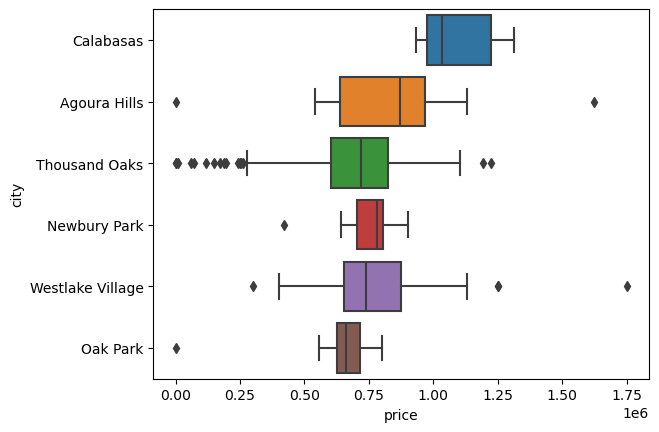

In [15]:
sns.boxplot(data = re_df[['price', 'city']], x='price', y='city')


<Axes: xlabel='price', ylabel='city'>

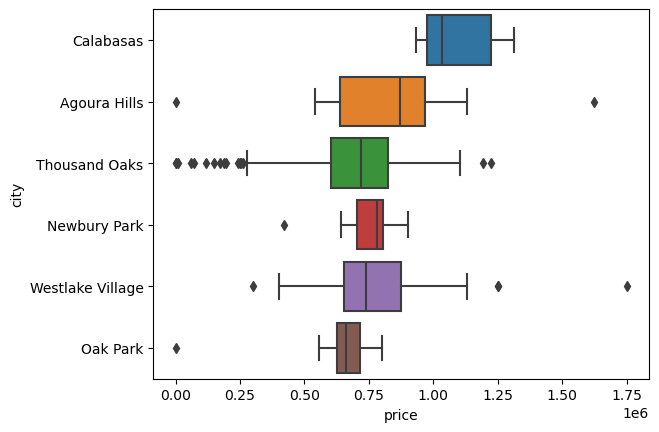

In [16]:
sns.boxplot(re_df, x='price', y='city')



To remove the outliers and reasonably maintain the idea of a starter home as one that is affordable, I will limit the price of the homes between 250k and 1,250k.

In [17]:
pd.set_option('display.max_rows', 100)

re_df = re_df[re_df['price']>250000]
re_df = re_df[re_df['price']<1250000]
re_df.shape

(563, 20)

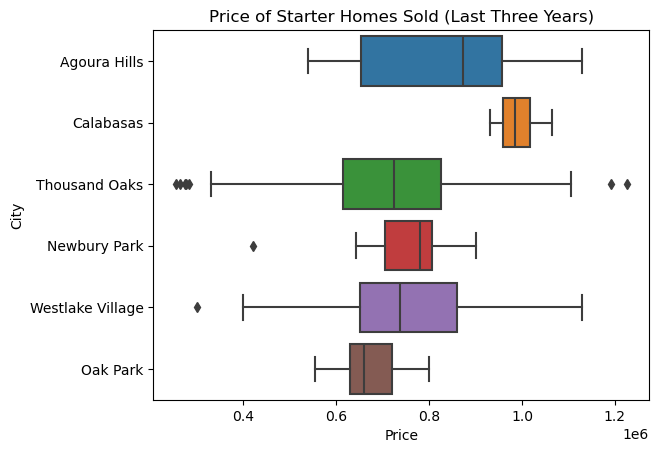

In [97]:
sns.boxplot(re_df, x='price', y='city')

plt.title('Price of Starter Homes Sold (Last Three Years)')
plt.xlabel('Price')
plt.ylabel('City')

plt.savefig('Images/pricebycity_last3yrs_boxplot.svg', format='svg')

In [19]:
re_df.groupby('city')['city'].count()

city
Agoura Hills         28
Calabasas             4
Newbury Park          7
Oak Park             39
Thousand Oaks       427
Westlake Village     58
Name: city, dtype: int64

/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

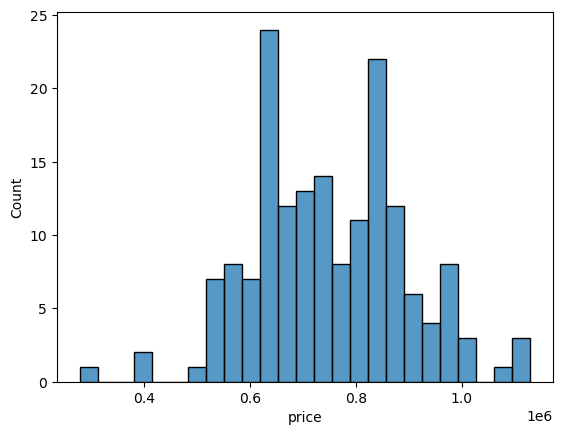

In [21]:
sns.histplot(re_df['price'][re_df['dateSold']>'2023-08-31'], bins=25)

In [22]:
re_df[re_df['dateSold']>'2023-09-05']

,address,zipCode,city,state,price,bed,bath,sqft,pricePerSf,lotArea,lotAreaType,dateSold,dateSoldNumeric,zillowUrl,latitude,longitude,homeType,zestimate,rentZestimate,imageUrl
7,"5429 Fairview Pl, Agoura Hills, CA 91301",91301,Agoura Hills,CA,1130000,2,1.0,880,1284.09,0.588361,acres,2024-07-11,1720681200000,https://zillow.com/homedetails/5429-Fairview-Pl-Agoura-Hills-CA-91301/19888787_zpid/,34.148880,-118.742370,SINGLE_FAMILY,1133500.0,3330,https://photos.zillowstatic.com/fp/ea96f246d3d49784879e16604572bbdb-p_e.jpg
11,"5666 Slicers Cir, Agoura Hills, CA 91301",91301,Agoura Hills,CA,910000,3,2.0,1218,747.13,3567.000000,sqft,2024-06-07,1717743600000,https://zillow.com/homedetails/5666-Slicers-Cir-Agoura-Hills-CA-91301/19888003_zpid/,34.154022,-118.790260,SINGLE_FAMILY,913200.0,4205,https://photos.zillowstatic.com/fp/8db0d9fb376dbd7a19b9e6a7ed0e4322-p_e.jpg
15,"5765 Lake Lindero Dr, Agoura Hills, CA 91301",91301,Agoura Hills,CA,995000,3,3.0,1320,753.79,4187.000000,sqft,2024-04-29,1714374000000,https://zillow.com/homedetails/5765-Lake-Lindero-Dr-Agoura-Hills-CA-91301/19889270_zpid/,34.156647,-118.789030,SINGLE_FAMILY,999400.0,4602,https://photos.zillowstatic.com/fp/cd1fefc524ef7e5e12ce653d569445b4-p_e.jpg
20,"26825 Cactus Trl, Calabasas, CA 91301",91301,Calabasas,CA,1065000,3,2.0,1355,785.98,4165.000000,sqft,2024-03-28,1711609200000,https://zillow.com/homedetails/26825-Cactus-Trl-Calabasas-CA-91301/19894261_zpid/,34.132225,-118.709250,SINGLE_FAMILY,1072300.0,4883,https://photos.zillowstatic.com/fp/814b933c74aea0af1b1e4353664662b1-p_e.jpg
22,"30541 Canwood St, Agoura Hills, CA 91301",91301,Agoura Hills,CA,560000,3,2.0,1038,539.50,1038.000000,sqft,2024-03-15,1710486000000,https://zillow.com/homedetails/30541-Canwood-St-Agoura-Hills-CA-91301/19887676_zpid/,34.147293,-118.786354,TOWNHOUSE,564500.0,3617,https://photos.zillowstatic.com/fp/21e13d87aae938da6c8dd9d9acbf1590-p_e.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,"1003 Thistlegate Rd, Oak Park, CA 91377",91377,Oak Park,CA,760000,2,2.0,1146,663.18,2524.000000,sqft,2024-02-28,1709107200000,https://zillow.com/homedetails/1003-Thistlegate-Rd-Oak-Park-CA-91377/16495989_zpid/,34.183000,-118.761080,TOWNHOUSE,773100.0,3550,https://photos.zillowstatic.com/fp/60431636e2712113be7d79d15b8da22a-p_e.jpg
27,"5785 Oak Bank Trl UNIT 105, Oak Park, CA 91377",91377,Oak Park,CA,625000,2,3.0,1244,502.41,1244.000000,sqft,2024-01-08,1704700800000,https://zillow.com/homedetails/5785-Oak-Bank-Trl-UNIT-105-Oak-Park-CA-91377/16496810_zpid/,34.182700,-118.766365,TOWNHOUSE,643300.0,3676,https://photos.zillowstatic.com/fp/1c7dca4df435fd309b2d28a705cf0e61-p_e.jpg
28,"4771 Via Bensa, Oak Park, CA 91377",91377,Oak Park,CA,729900,2,3.0,1240,588.63,1241.460000,sqft,2023-12-28,1703750400000,https://zillow.com/homedetails/4771-Via-Bensa-Oak-Park-CA-91377/16486770_zpid/,34.177696,-118.786680,TOWNHOUSE,753100.0,3450,https://photos.zillowstatic.com/fp/defcbadaef717d2866839dad6afe1546-p_e.jpg
29,"4790 Gondola Dr, Oak Park, CA 91377",91377,Oak Park,CA,715000,2,3.0,1240,576.61,1240.000000,sqft,2023-12-21,1703145600000,https://zillow.com/homedetails/4790-Gondola-Dr-Oak-Park-CA-91377/16486757_zpid/,34.176780,-118.786420,TOWNHOUSE,738900.0,3450,https://photos.zillowstatic.com/fp/54589b5fecd62c8210a163173833fbcc-p_e.jpg


In [23]:
re_df_recent = re_df[re_df['dateSold']>'2023-09-05']

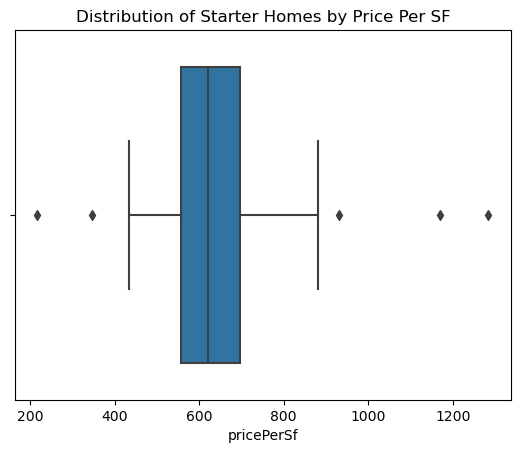

In [96]:
sns.boxplot(re_df_recent, x='pricePerSf', whis=1.5)

plt.title('Distribution of Starter Homes by Price Per SF')

plt.savefig('Images/pricepersf_boxplot.svg', format='svg')

In [25]:
# Find the range of values that encompasses 85% of the values
# for i in range(10):
#     print(np.quantile(a=re_df_recent['pricePerSf'],q=i*.1))
range_list = [.075, .925]
for i in range_list:
    print(np.quantile(a=re_df_recent['pricePerSf'],q=i))

503.5075
787.895


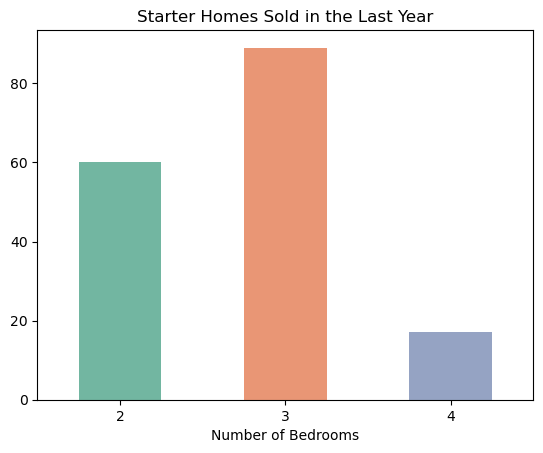

In [26]:
bed_count = re_df_recent.groupby('bed').count().reset_index()

bed_count = bed_count[['bed', 'address']]
bed_count.columns = ['#beds', 'count']

ax = sns.barplot(data=bed_count, x='#beds', y='count', width=.5, palette='Set2')
ax.set_title('Starter Homes Sold in the Last Year')
ax.set_ylabel('')
ax.set_xlabel('Number of Bedrooms')

plt.savefig('Images/starterhomessold_beds.svg', format='svg')

No starter homes sold in newbury park

Text(0.5, 1.0, 'Starter Homes Sold in the Last Year')

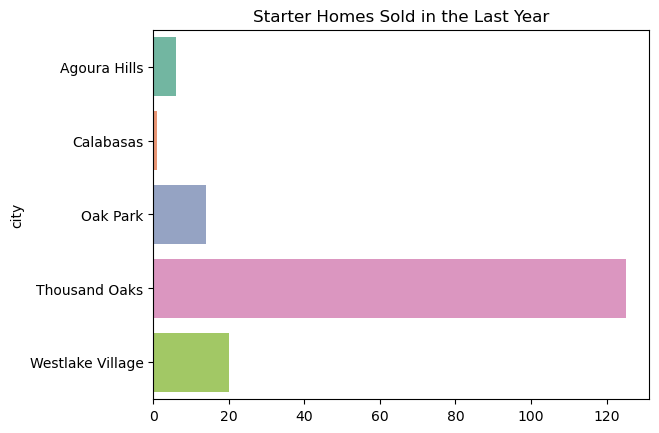

In [27]:
city_count = re_df_recent.groupby('city')['city'].count()

# city_count = city_count.reset_index()
city_count_df = pd.DataFrame()
city_count_df['city'] = city_count.index
city_count_df['count'] = city_count.unique()

ax = sns.barplot(city_count_df, x='count', y='city', palette='Set2')
ax.set_xlabel('')
ax.set_ylabel('city')
ax.set_title('Starter Homes Sold in the Last Year')

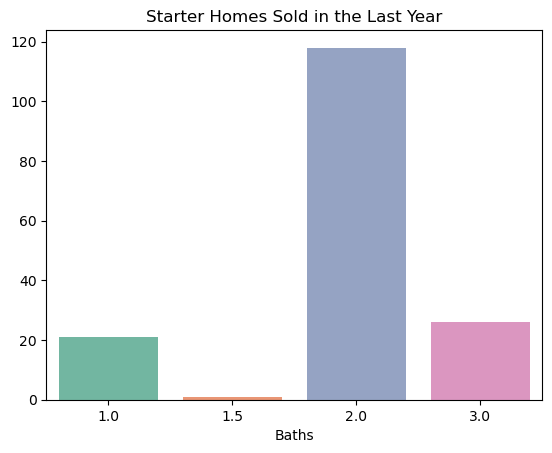

<Figure size 640x480 with 0 Axes>

In [93]:
prop_count = re_df_recent.groupby('bath')['bath'].count()
    
# city_count = city_count.reset_index()
prop_count_df = pd.DataFrame()
prop_count_df['bath'] = prop_count.index
prop_count_df['count'] = prop_count.unique()

prop_count_df

ax = sns.barplot(prop_count_df, x='bath', y='count', palette='Set2')
ax.set_xlabel('Baths')
ax.set_ylabel('')
ax.set_title('Starter Homes Sold in the Last Year')

plt.show()

plt.savefig('Images/starterhomessold_baths.svg', format='svg')

In [30]:
re_df_recent.columns

Index(['address', 'zipCode', 'city', 'state', 'price', 'bed', 'bath', 'sqft',
       'pricePerSf', 'lotArea', 'lotAreaType', 'dateSold', 'dateSoldNumeric',
       'zillowUrl', 'latitude', 'longitude', 'homeType', 'zestimate',
       'rentZestimate', 'imageUrl'],
      dtype='object')

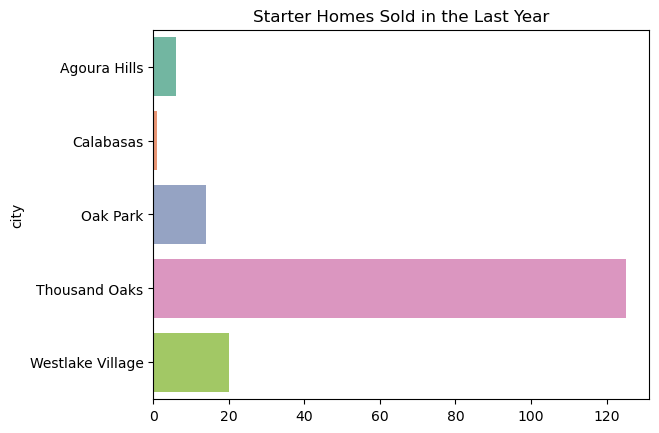

In [92]:
col_list = ['city', 'bed', 'bath', 'homeType']
x=0
for i in range(2):
    for j in range(2):
        prop_count = re_df_recent.groupby('city')['city'].count()

        # city_count = city_count.reset_index()
        city_count_df = pd.DataFrame()
        city_count_df['city'] = city_count.index
        city_count_df['count'] = city_count.unique()
        
        ax = sns.barplot(city_count_df, x='count', y='city', palette='Set2')
        ax.set_xlabel('')
        ax.set_ylabel('city')
        ax.set_title('Starter Homes Sold in the Last Year')

plt.savefig('Images/starterhomelocation_lastyear.svg', format='svg')

In [32]:
# Create some pair grids with the scaled numerical data

recent_snum = re_df_recent[['price','bed','bath','sqft','pricePerSf','lotArea',
       'zestimate','rentZestimate']]

recent_snum = recent_snum[recent_snum['lotArea']>749]

/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

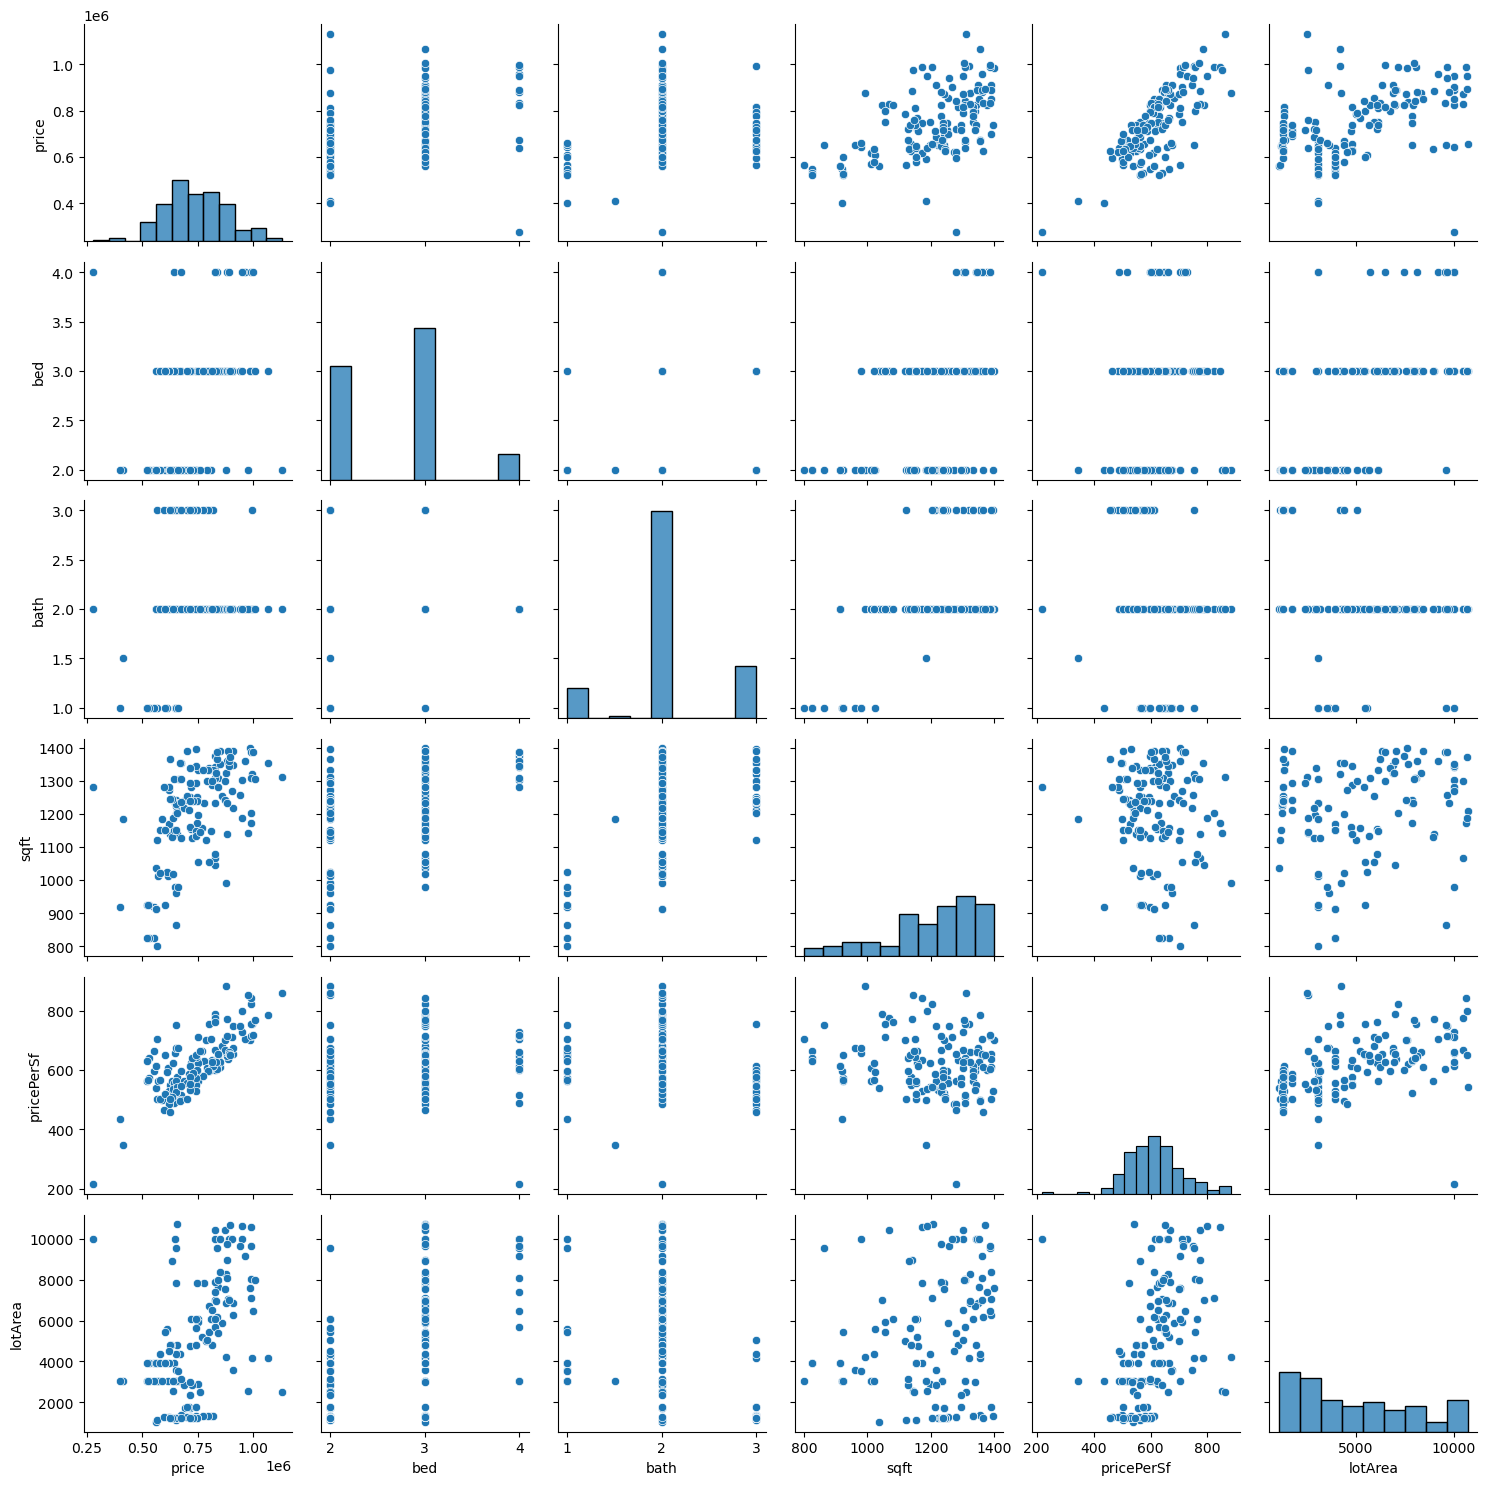

In [33]:
g = sns.PairGrid(recent_snum[['price','bed','bath','sqft','pricePerSf','lotArea']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

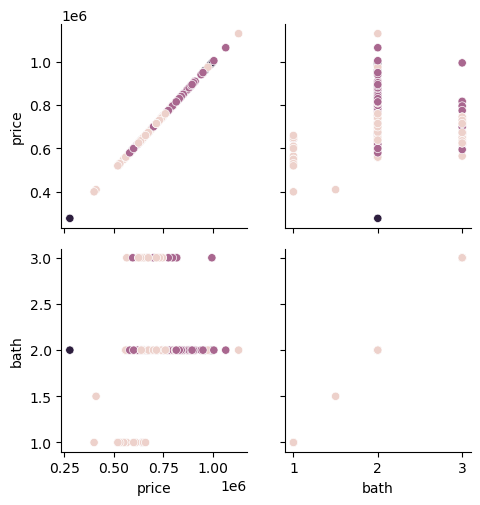

In [34]:
g = sns.PairGrid(recent_snum, vars=['price','bath'], hue='bed')
g.map(sns.scatterplot)

/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

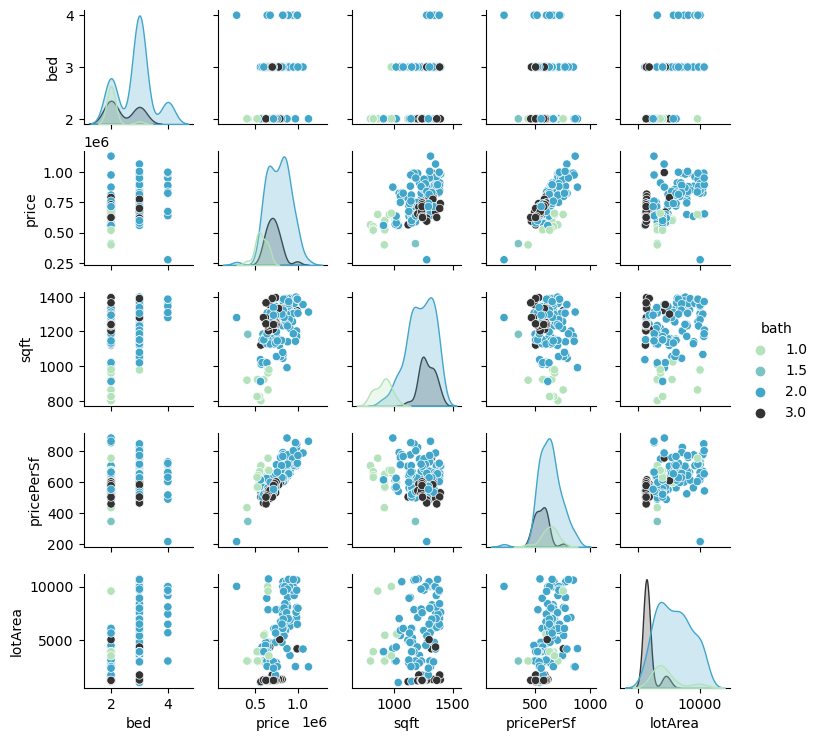

In [35]:
sns.pairplot(recent_snum[['bed','price','bath','sqft','pricePerSf','lotArea']], hue='bath', palette='GnBu_d', height=1.5)

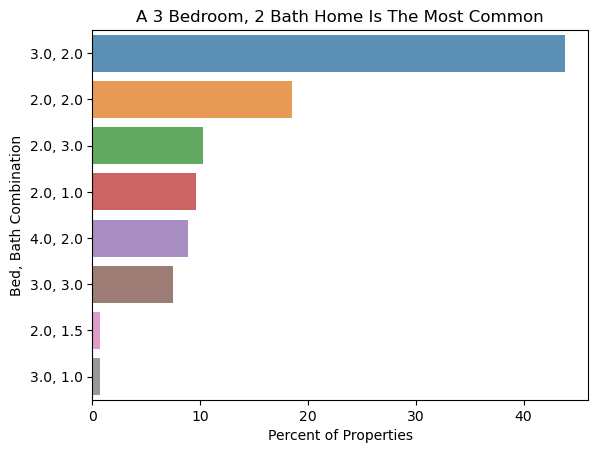

In [91]:
df_re_config = recent_snum.groupby(['bed', 'bath']).size()/len(recent_snum)

df_re_config = df_re_config.reset_index()

# create an empty list to hold the bed/bath configurations
bed_bath_config = []

for index, row in df_re_config.iterrows():
    bed_bath_config.append(f'{row["bed"]}, {row["bath"]}')

# add a column
df_re_config['bed_bath_config'] = bed_bath_config
# rename the columns
df_re_config.columns = ['bed', 'bath', 'count_perc', 'bed_bath_config']
# sort the count by percentage
df_re_config = df_re_config.sort_values(by=['count_perc'], ascending=False)
# express as a percentage
df_re_config['count_perc'] = round(df_re_config['count_perc']*100, 1)

sns.barplot(data=df_re_config, y='bed_bath_config', x='count_perc', alpha=.8)
plt.title('A 3 Bedroom, 2 Bath Home Is The Most Common')
plt.ylabel('Bed, Bath Combination')
plt.xlabel('Percent of Properties')

plt.savefig('Images/mostcommonconfig_3_2.svg', format='svg')

In [52]:
re_df['dateSold'].sort_values().head()

402   2021-09-07
138   2021-09-08
136   2021-09-09
400   2021-09-09
381   2021-09-09
Name: dateSold, dtype: datetime64[ns]

/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


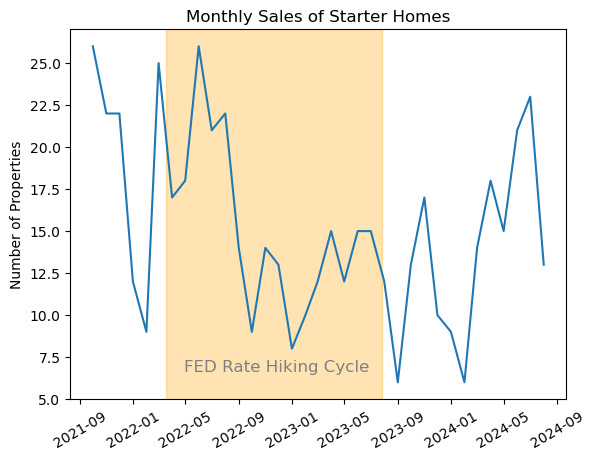

In [90]:
import datetime
import matplotlib.dates as mdates

# Using the three year time span
re_monthly_df = re_df.copy()

re_monthly_df['year'] = pd.DatetimeIndex(re_monthly_df['dateSold']).year
re_monthly_df['month'] = pd.DatetimeIndex(re_monthly_df['dateSold']).month
# count of properties sold in each month while excluding partial months
re_monthly_df = re_monthly_df.groupby(['year', 'month']).size().reset_index()[1:36]

re_monthly_df_list = []

for index, row in re_monthly_df.iterrows():
    re_monthly_df_list.append(f"{row['year']}/{row['month']}")

re_monthly_df['year_month'] = re_monthly_df_list

re_monthly_df['year_month'] = pd.to_datetime(re_monthly_df['year_month'], format="%Y/%m")
# rename columns
re_monthly_df.columns = ['year', 'month', 'count', 'year_month']

# Create a line graph to show monthly purchases
fig, ax = plt.subplots()
ax = sns.lineplot(data=re_monthly_df, x='year_month', y='count')
plt.xticks(rotation=30)
plt.title('Monthly Sales of Starter Homes')
plt.xlabel('')
plt.ylabel('Number of Properties')

ax.axvspan(mdates.date2num(datetime.datetime(2022, 3, 17)),
           mdates.date2num(datetime.datetime(2023, 7, 26)),
           color='orange', alpha=0.3, label='Rate Hiking Cycle')

ax.text(.23, .075, 'FED Rate Hiking Cycle',
       fontsize=12, color='grey',
       transform=ax.transAxes)

plt.savefig('Images/monthlysalesstarterhomes.svg', format='svg')